In [0]:
# darknet 다운로드
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 11647 (delta 20), reused 27 (delta 12), pack-reused 11606
Receiving objects: 100% (11647/11647), 11.00 MiB | 6.55 MiB/s, done.
Resolving deltas: 100% (7883/7883), done.


In [0]:
# google drive mount
import os.path
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')

In [0]:
# darknet 컴파일
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

/content/darknet
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	  -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gencode arch=compute_72,code=[sm_72,compute_72]

# GTX 1080, GTX 1070, GTX 1060, GTX 1050, GTX 1030, Titan Xp

In [0]:
# google drive에 있는 데이터를 VM으로 카피
import shutil
  
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/yolo-logo_test.zip' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [0]:
!unzip data/yolo-logo_test.zip -d data/ # adjust the dataset filename which you have downloaded from Google drive

Archive:  data/yolo-logo.zip
  inflating: data/.DS_Store          
  inflating: data/img/5bbd9c2d219ef.jpg  
  inflating: data/img/5bbd9c2d219ef.txt  
  inflating: data/img/70cce818864913.562d0a19534ff.jpg  
 extracting: data/img/70cce818864913.562d0a19534ff.txt  
  inflating: data/img/beer_143730.jpg  
 extracting: data/img/beer_143730.txt  
  inflating: data/img/budweiser-beer-anheuser-busch-lager-distilled-beverage-beer-thumb.jpg  
  inflating: data/img/budweiser-beer-anheuser-busch-lager-distilled-beverage-beer-thumb.txt  
  inflating: data/img/budweiser-budvar-brewery-beer-anheuser-busch-inbev-beer-thumb.jpg  
  inflating: data/img/budweiser-budvar-brewery-beer-anheuser-busch-inbev-beer-thumb.txt  
  inflating: data/img/google_asahi1.png  
  inflating: data/img/google_asahi1.txt  
  inflating: data/img/google_asahi10.png  
  inflating: data/img/google_asahi10.txt  
  inflating: data/img/google_asahi2.png  
 extracting: data/img/google_asahi2.txt  
  inflating: data/img/google_asah

In [0]:
# 처음 학습하는 경우를 위해 weight 파일 다운로드
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2019-12-09 10:29:49--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  21.5MB/s    in 8.3s    

2019-12-09 10:29:58 (18.6 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
!sed -i 's/batch=1/batch=4/g' cfg/yolov3.cfg
!sed -i 's/subdivisions=1/subdivisions=32/g' cfg/yolov3.cfg
!sed -i 's/max_batches = 500200/max_batches = 20000/g' cfg/yolov3.cfg
!sed -i 's/steps=400000,450000/steps=16000,18000/g' cfg/yolov3.cfg
!sed -i 's/classes=80/classes=10/g' cfg/yolov3.cfg
!sed -i 's/filters=255/filters=45/g' cfg/yolov3.cfg
!cat cfg/yolov3.cfg

[net]
# Testing
batch=4
subdivisions=32
# Training
# batch=64
# subdivisions=326
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 20000
policy=steps
steps=16000,18000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutional

In [0]:
#use the line below to train a fresh model
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74 # 처음 학습 하는 경우 
# !./darknet detector train data/obj.data cfg/yolov3.cfg yolo-obj_last.weights # 이후에 학습하는 경우

yolov3
net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1

In [0]:
# 학습한 가중치 파일을 google drive 에 카피 
# 가중치 파일의 이름을 바꿔서 사용하면 된다. yolo-obj_last.weights -> 바꾸고 싶은 이름

from os import path
from google.colab import drive

!cp /content/darknet/backup/yolo-obj_last.weights /content/gdrive/My\ Drive/yolo-obj_last.weights

In [0]:
# 훈련한 모델을 가지고 예측 
# 명렁어 - ./darknet detector test [.data 파일 경로] [.weights 파일 경로] [이미지 경로]
!./darknet detector test data/obj.data cfg/yolov3.cfg /content/gdrive/My\ Drive/yolo-obj_last.weights data/test_img/google_cass_fresh3.png

net.optimized_memory = 0 
batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256       3 x 3/ 2    104 x 104 x 128 ->   52 x  52 x 256 1.595 BF

In [0]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    else:
      print('failed to open file')

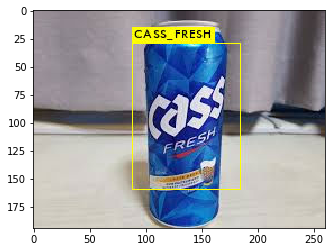

In [0]:
display_image()